In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
df=pd.read_csv("C:\\Users\\Pranay\\Desktop\\rakesh data and analysis\\1st hackethon\\train_2kmZucJ.csv",encoding='utf-8',index_col=None)
testdf=pd.read_csv("C:\\Users\\Pranay\\Desktop\\rakesh data and analysis\\1st hackethon\\test_oJQbWVk.csv",encoding='utf-8')
test_df=testdf.replace(r'\n',r'',regex=True)
train_df=df.replace(r'\n',r'',regex=True)

In [3]:
#test_df.drop("id",axis=1,inplace=True)
train_df.drop(["id"],axis=1,inplace=True)

In [4]:
vi_train=train_df.groupby("label").agg({'label':'count'})

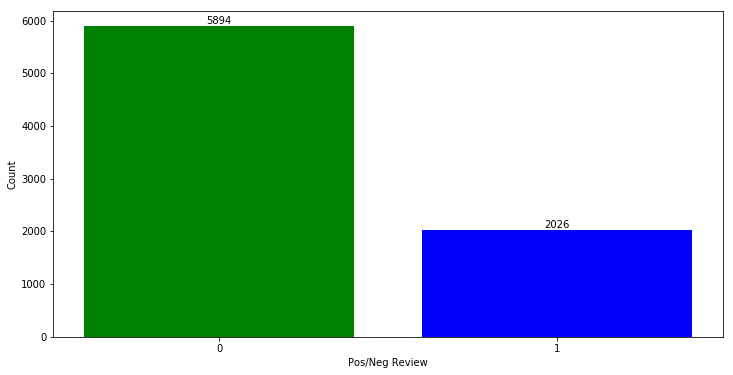

In [5]:
plt.figure(figsize=(12,6))
fig1=plt.bar(range(2),vi_train.label,color='gb')
plt.xticks([0,1])
plt.ylabel("Count")
plt.xlabel("Pos/Neg Review")
for rect in fig1:
    height = rect.get_height()
    #print(height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    #print(rect.get_x(),rect.get_width())
#plt.legend()

In [6]:
# text cleaning at best
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as soup

pattern1 = r'@[A-Za-z0-9]+'
pattern2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pattern1, pattern2))
def text_cleanning(text):
    mod = soup(text, 'lxml')
    text_1 = mod.get_text()
    text_2 = re.sub(combined_pat, '', text_1)
    try:
        text_3 = text_2.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        text_3 = text_2
    letters_in_text = re.sub("[^a-zA-Z]", " ", text_3)
    lower_case_text = letters_in_text.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    text_token = wordpunct_tokenize(lower_case_text)
    text_fil=[word for word in text_token if word not in stopwords.words('english')]
    return " ".join(text_fil).strip()

#testing = train_df.tweet[:1000]
#testing1 = test_df.tweet[:1000]
#test_result = []
#for t in testing:
#    test_result.append(text_cleanning(t))
#test_result1=[]
#for t in testing1:
#    test_result1.append(text_cleanning(t))


In [7]:
%%time
clean_train_texts=[]
for i in range(7920):
    clean_train_texts.append(text_cleanning(train_df['tweet'][i]))

    
clean_test_texts=[]
for i in range(1953):
    clean_test_texts.append(text_cleanning(test_df['tweet'][i]))

Wall time: 44.4 s


In [8]:
train_df['tweet']=pd.Series(clean_train_texts)
test_df['tweet']=pd.Series(clean_test_texts)

In [9]:
len(test_df)

1953

#removing all stop words from the text
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
def stopword_filteration(text):
    text_token=wordpunct_tokenize(text)
    text_fil=[word for word in text_token if word not in stopwords.words('english')]
    return " ".join(text_fil).strip()

text_token=wordpunct_tokenize(train_df['tweet'][5])
print(text_token)
text_fil=[word for word in text_token if word not in stopwords.words('english')]
print(" ".join(text_fil).strip())

In [10]:
train_df.groupby('label').agg({'label':'count'})

,label
label,
0,5894
1,2026


In [11]:
train_df=train_df.sort_values('label').copy(True)

In [12]:
neg_tweets=train_df[train_df['label']==0]
neg_comm=neg_tweets["tweet"].str.cat(sep=" ")

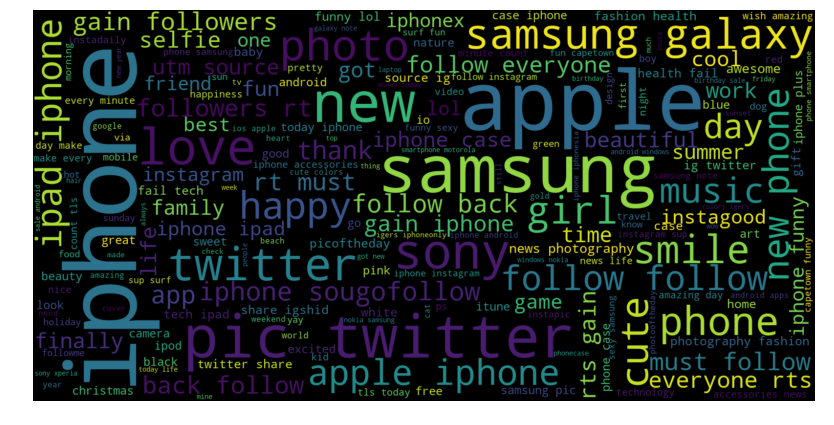

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_comm)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
pos_tweets=train_df[train_df['label']==1]
pos_comm=pos_tweets["tweet"].str.cat(sep=" ")

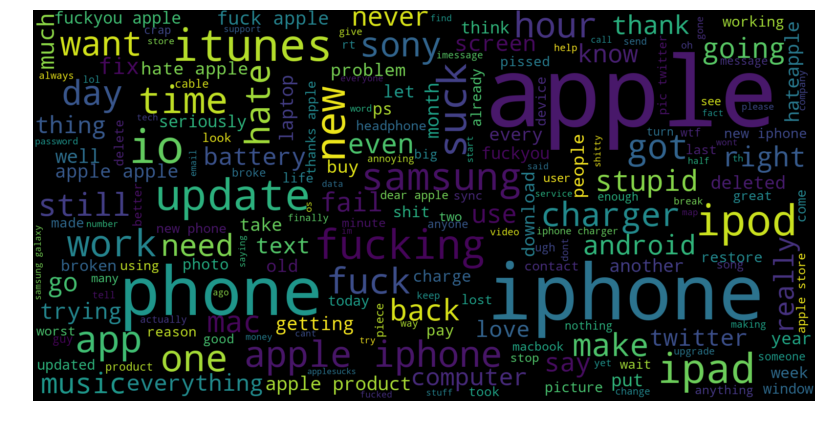

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_comm)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token=RegexpTokenizer(r'[a-zA-Z0-9]+]?')
cv=CountVectorizer(lowercase=True,stop_words='english',tokenizer=token.tokenize)
train_data_x=cv.fit_transform(train_df['tweet'])
test_data_x=cv.transform(test_df['tweet'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_data_x, df["label"], test_size=0.35, random_state=45)

In [18]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

MultinomialNB Accuracy: 0.7038239538239538
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      2082
           1       0.29      0.13      0.17       690

   micro avg       0.70      0.70      0.70      2772
   macro avg       0.52      0.51      0.50      2772
weighted avg       0.64      0.70      0.66      2772



In [19]:
predict2=clf.predict(test_data_x)
df_sub=pd.read_csv("C:\\Users\\Pranay\\Desktop\\rakesh data and analysis\\1st hackethon\\sample_submission_LnhVWA4.csv",encoding='utf-8')
print("MultinomialNB Accuracy:",metrics.accuracy_score(df_sub["label"], predict2))
from sklearn.metrics import classification_report
print(classification_report(df_sub["label"], predict2))

MultinomialNB Accuracy: 0.9646697388632872
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1953
           1       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96      1953
   macro avg       0.50      0.48      0.49      1953
weighted avg       1.00      0.96      0.98      1953



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [20]:
print(metrics.confusion_matrix(df_sub["label"], predict2))

[[1884   69]
 [   0    0]]


In [21]:
# to improve accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.tokenize import RegexpTokenizer
# token=RegexpTokenizer(r'[a-zA-Z0-9]+]?')
cv=TfidfVectorizer()
train_data_x_tf=cv.fit_transform(train_df['tweet'])
test_data_x_tf=cv.transform(test_df['tweet'])

In [22]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_data_x_tf, df["label"], test_size=0.35, random_state=45)

In [23]:
clf = MultinomialNB().fit(X_train, y_train)
predicted_tf= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted_tf))
print(metrics.classification_report(y_test, predicted_tf))

MultinomialNB Accuracy: 0.7510822510822511
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2082
           1       0.00      0.00      0.00       690

   micro avg       0.75      0.75      0.75      2772
   macro avg       0.38      0.50      0.43      2772
weighted avg       0.56      0.75      0.64      2772



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
predict_tf=clf.predict(test_data_x_tf)
print("MultinomialNB Accuracy:",metrics.accuracy_score(df_sub["label"], predict_tf))
print(metrics.confusion_matrix(df_sub["label"], predict_tf))

MultinomialNB Accuracy: 1.0
[[1953]]


In [25]:
# for better prediction
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.74
Best parameters:  {'C': 0.001}
Best estimator:  LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [26]:
log_reg = grid.best_estimator_
log_reg.fit(X_train, y_train)
predict_log_reg_x_test=log_reg.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predict_log_reg_x_test))
print(metrics.classification_report(y_test, predict_log_reg_x_test))

MultinomialNB Accuracy: 0.7510822510822511
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2082
           1       0.00      0.00      0.00       690

   micro avg       0.75      0.75      0.75      2772
   macro avg       0.38      0.50      0.43      2772
weighted avg       0.56      0.75      0.64      2772



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
predict_log_reg=log_reg.predict(test_data_x_tf)
print(predict_log_reg)

[0 0 0 ... 0 0 0]


In [28]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(df_sub["label"], predict_log_reg))

MultinomialNB Accuracy: 1.0


In [29]:
print(metrics.confusion_matrix(df_sub["label"], predict_log_reg))

[[1953]]


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# from nltk.tokenize import RegexpTokenizer
# token=RegexpTokenizer(r'[a-zA-Z0-9]+]?')
cv=TfidfVectorizer(tokenizer=word_tokenize,ngram_range={1,3})
train_data_x_tf1=cv.fit_transform(train_df['tweet'])
test_data_x_tf1=cv.transform(test_df['tweet'])

In [31]:
print(train_data_x_tf1)

  (0, 40459)	0.18666650988972797
  (0, 100568)	0.21578347334589007
  (0, 125266)	0.17837660064946198
  (0, 2805)	0.09258090542851334
  (0, 7576)	0.10910047573498811
  (0, 11725)	0.10580598059649787
  (0, 28204)	0.0976804730800561
  (0, 54438)	0.12042902885994251
  (0, 58076)	0.11606377065695683
  (0, 66625)	0.11805718000706036
  (0, 66842)	0.11720572227413825
  (0, 62836)	0.041693604369851346
  (0, 40464)	0.21578347334589007
  (0, 100569)	0.21578347334589007
  (0, 125267)	0.21578347334589007
  (0, 2830)	0.14050947139228054
  (0, 7601)	0.15444598352735348
  (0, 11787)	0.15134242062114114
  (0, 28375)	0.21578347334589007
  (0, 54454)	0.21578347334589007
  (0, 58150)	0.14143928325237856
  (0, 66686)	0.1902493103269596
  (0, 66887)	0.14558216372578275
  (0, 40465)	0.21578347334589007
  (0, 100570)	0.21578347334589007
  :	:
  (7918, 126806)	0.2692339443597042
  (7918, 58969)	0.2692339443597042
  (7918, 70577)	0.2692339443597042
  (7918, 139605)	0.2692339443597042
  (7918, 141116)	0.26923394

In [32]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_data_x_tf1, df["label"], test_size=0.35, random_state=49)

In [33]:
clf = MultinomialNB().fit(X_train, y_train)
predicted_tf= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted_tf))
print(metrics.classification_report(y_test, predicted_tf))

MultinomialNB Accuracy: 0.7518037518037518
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2084
           1       0.00      0.00      0.00       688

   micro avg       0.75      0.75      0.75      2772
   macro avg       0.38      0.50      0.43      2772
weighted avg       0.57      0.75      0.65      2772



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
predict_tf1=clf.predict(test_data_x_tf1)
print("MultinomialNB Accuracy:",metrics.accuracy_score(df_sub["label"], predict_tf1))
print(metrics.confusion_matrix(df_sub["label"], predict_tf1))

MultinomialNB Accuracy: 1.0
[[1953]]


In [35]:
print(len(predict_tf1))
print(list(predict_tf1))

1953
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [36]:
test_df.drop("tweet",inplace=True,axis=1)

In [37]:
#test_df['label']=pd.Series(predict_log_reg)

In [46]:
test_df['label']=pd.Series(predict_tf1)
test_df.set_index('id',drop=True)

,label
id,
7921,0
7922,0
7923,0
7924,0
7925,0
7926,0
7927,0
7928,0
7929,0


In [47]:
test_df.to_csv("hackthon_submission.csv",encoding='utf-8')
mydata=pd.read_csv('hackthon_submission.csv')
mydata

,Unnamed: 0,id,label
0,0,7921,0
1,1,7922,0
2,2,7923,0
3,3,7924,0
4,4,7925,0
5,5,7926,0
6,6,7927,0
7,7,7928,0
8,8,7929,0
9,9,7930,0
